# Introduction

### Import the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

### Notebook display settings

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

import warnings
warnings.filterwarnings("ignore")

### Default figure settings

In [4]:
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.labelweight']='normal'
mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"

### Get the number of cpu

In [5]:
import multiprocessing as mp
n_cpu=mp.cpu_count()

# Data Transformation & Exploration

### Read the data

In [6]:
training_data=pd.read_csv('Data/epl-training.csv')
# Dropping the trailing columns
training_data.dropna(axis=1, how='all',inplace=True)
training_data.drop([column for column in training_data.columns if 'Unnamed' in column], axis = 1, inplace=True) 
training_data.shape

(4180, 22)

In [7]:
training_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2008,Arsenal,West Brom,1,0,H,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0
1,16/08/2008,Bolton,Stoke,3,1,H,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0
2,16/08/2008,Everton,Blackburn,2,3,A,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0
3,16/08/2008,Hull,Fulham,2,1,H,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0
4,16/08/2008,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0


### Exploratory Data Analysis

In [8]:
def get_pivot_column_vs_column_count(df,col1,col2):
    return df.groupby([col1,col2]).size().reset_index().\
              rename(columns={0:'counts'}).\
              pivot(values='counts',index=col1,columns=col2)

In [9]:
def get_column_countplot(df,col,y='FTR',ax=None ):
    if ax is None:
        ax = plt.gca()
    df.groupby([col, y]).size().reset_index().\
       pivot(columns=y, index=col, values=0).\
       plot(kind='bar', stacked=True,ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Counts')
    ax.set_title('Count Plot: %s'%(col))

#### Number of matches

In [10]:
get_pivot_column_vs_column_count(training_data,'HomeTeam','AwayTeam')

AwayTeam,Arsenal,Aston Villa,Birmingham,Blackburn,Blackpool,Bolton,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Hull,Leicester,Liverpool,Man City,Man United,Middlesbrough,Newcastle,Norwich,Portsmouth,QPR,Reading,Southampton,Stoke,Sunderland,Swansea,Tottenham,Watford,West Brom,West Ham,Wigan,Wolves
HomeTeam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arsenal,NaN,8.0,2.0,4.0,1.0,4.0,4.0,2.0,5.0,2.0,11.0,6.0,11.0,7.0,2.0,5.0,5.0,11.0,11.0,11.0,2.0,9.0,4.0,2.0,3.0,1.0,7.0,10.0,9.0,7.0,11.0,4.0,9.0,10.0,5.0,4.0
Aston Villa,8.0,NaN,2.0,4.0,1.0,4.0,1.0,NaN,2.0,1.0,8.0,3.0,8.0,6.0,NaN,4.0,2.0,8.0,8.0,8.0,1.0,7.0,4.0,2.0,3.0,1.0,4.0,8.0,8.0,5.0,8.0,1.0,7.0,7.0,5.0,3.0
Birmingham,2.0,2.0,NaN,2.0,1.0,2.0,NaN,NaN,1.0,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,2.0,2.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,2.0
Blackburn,4.0,4.0,2.0,NaN,1.0,4.0,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Blackpool,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0
Bolton,4.0,4.0,2.0,4.0,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN,4.0,4.0,NaN,2.0,NaN,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,NaN,NaN,4.0,4.0,1.0,4.0,NaN,3.0,3.0,4.0,3.0
Bournemouth,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,4.0,4.0,4.0,1.0,2.0,1.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,NaN,NaN,NaN,4.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,NaN,1.0
Brighton,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,NaN,1.0
Burnley,5.0,2.0,1.0,1.0,NaN,1.0,3.0,2.0,NaN,1.0,5.0,4.0,5.0,2.0,2.0,3.0,4.0,5.0,5.0,5.0,1.0,3.0,NaN,1.0,1.0,NaN,4.0,4.0,3.0,3.0,5.0,3.0,3.0,5.0,1.0,2.0


### HTR vs. FTR

In [11]:
get_pivot_column_vs_column_count(training_data,'HTR','FTR')

FTR,A,D,H
HTR,,,
A,703,199,99
D,439,647,646
H,70,191,1186


In [12]:
cat_col_list=[x for x in training_data.columns\
              if x not in ['Date','HomeTeam','AwayTeam','Referee','FTR','HTR']]

In [13]:
cat_col_list = np.reshape(cat_col_list, (8, 2))

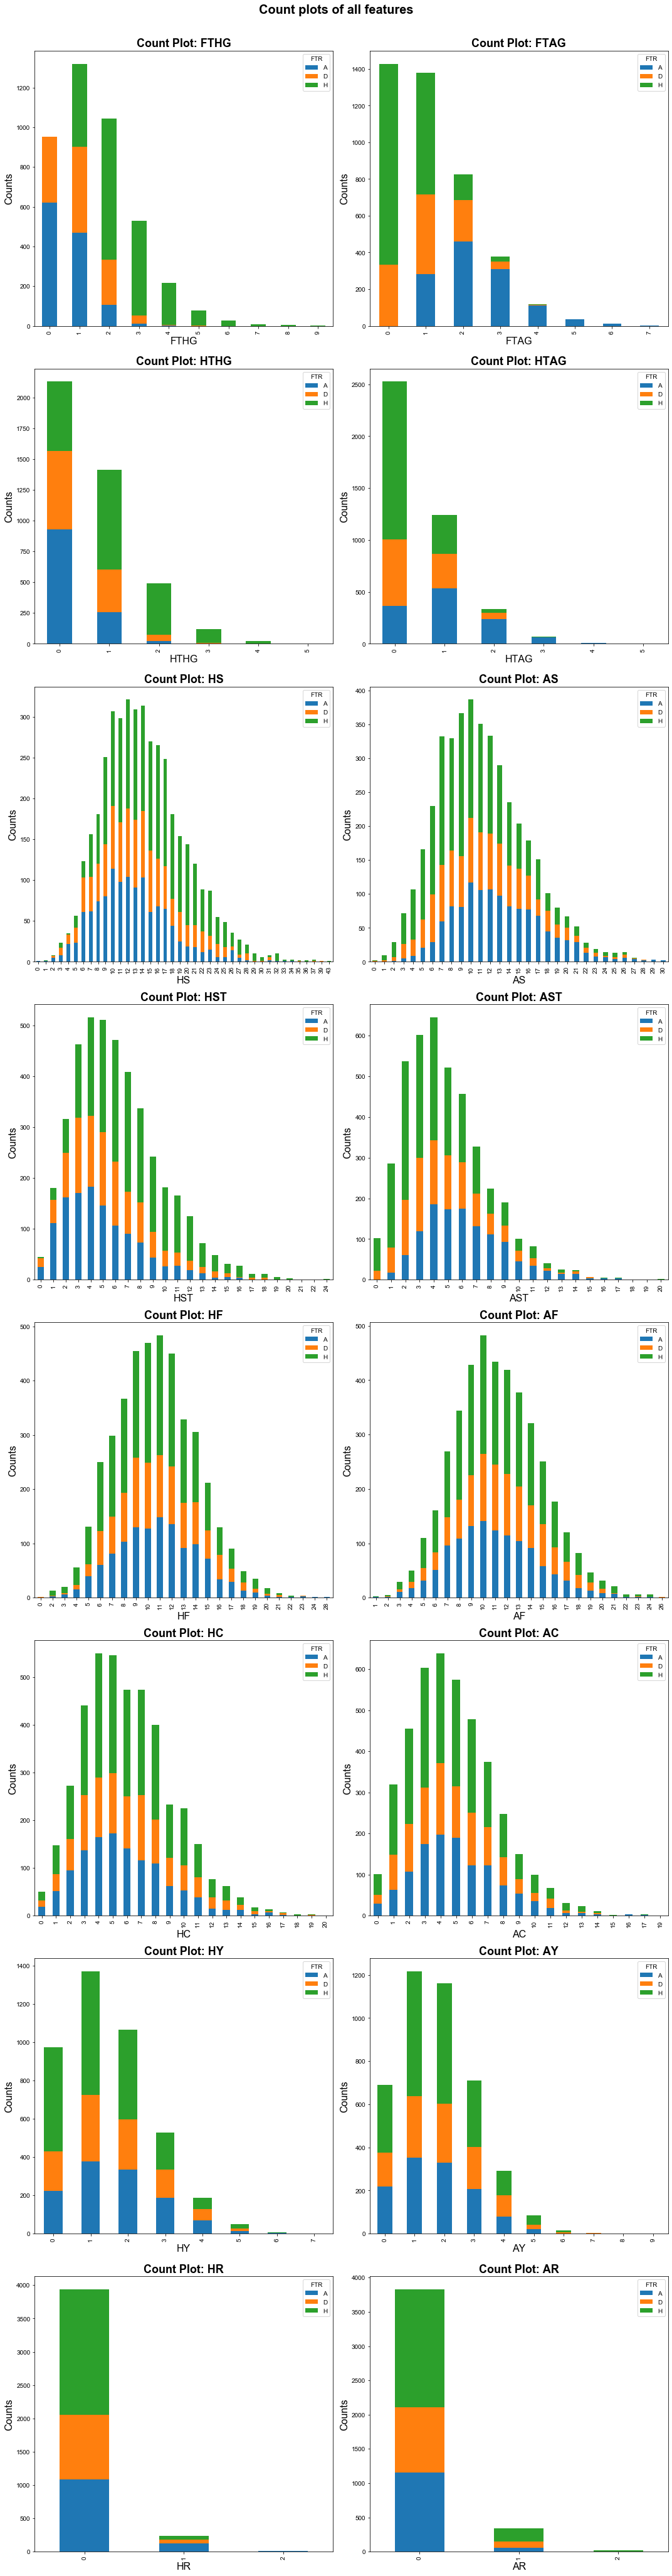

In [14]:
fig, axes = plt.subplots(8,2,figsize=(15,60))
for i in range(8):
    for j in range(2):
        get_column_countplot(training_data,cat_col_list[i][j], ax=axes[i,j])
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.suptitle("Count plots of all features",fontweight='bold',fontsize=20)
plt.show()

### Checking the dataset is balanced

In [15]:
count_val=training_data['FTR'].value_counts()

In [16]:
count_val

H    1931
A    1212
D    1037
Name: FTR, dtype: int64

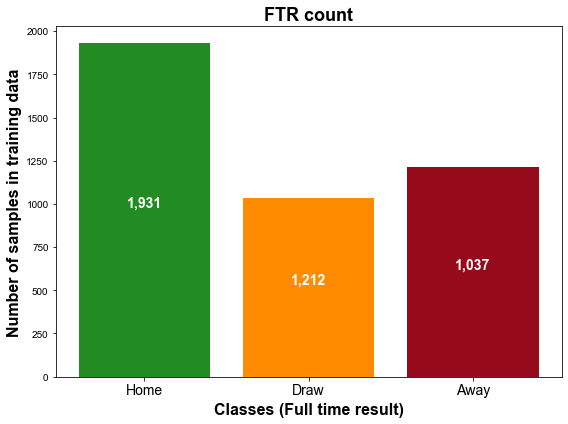

In [17]:
count_val=training_data['FTR'].value_counts()

#Visualising the count
X_ticks=['Home','Draw','Away']
bar_width=0.7
fig,ax=plt.subplots()
plt.bar(1,count_val[0],color='forestgreen')
plt.bar(2,count_val[2],color='darkorange')
plt.bar(3,count_val[1],color='#970a1b')
plt.text(1, count_val[0]/2, "{:,}".format(count_val[0]),color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(2, count_val[2]/2, "{:,}".format(count_val[1]), color='w'
         ,ha='center', va= 'bottom',fontweight='bold',fontsize=14)
plt.text(3, count_val[1]/2, "{:,}".format(count_val[2]), color='w',
         ha='center', va= 'bottom',fontweight='bold',fontsize=14)
ax.set_title('FTR count',fontsize=18,fontweight='bold')
ax.set_xlabel('Classes (Full time result)',fontsize=16,fontweight='bold')
ax.set_ylabel('Number of samples in training data',fontsize=16,
              fontweight='bold')
ax.set_xticks([1,2,3])
ax.set_xticklabels(X_ticks,fontsize=14)
fig.tight_layout()
plt.show()

### Calculate the correlation between the features

In [18]:
correlation = training_data.corr()
corr_array  = np.array(correlation)

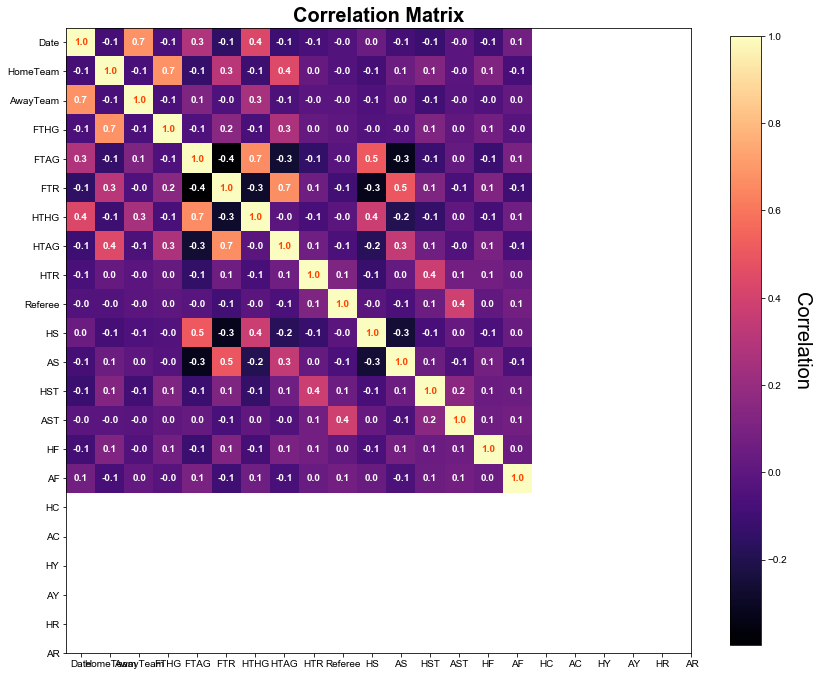

In [19]:
fig, ax = plt.subplots(figsize=(14,14))
im = ax.imshow(corr_array,cmap='magma')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Correlation', rotation=-90, va="bottom",fontsize=20)
data = im.get_array()
textcolors=['#FFFFFF','#FF4500']
for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, '%1.1f'%data[i, j], 
                                color=textcolors[data[i, j]>0.85],
                                ha='center',va='center',fontweight='bold')
ax.set_title('Correlation Matrix',fontsize=20,fontweight='bold')
ax.set_xticks(np.arange(len(training_data.columns.tolist())))
ax.set_yticks(np.arange(len(training_data.columns)))
ax.set_xticklabels(training_data.columns)
ax.set_yticklabels(training_data.columns)
plt.show()

# Methodology Overview

## Feature Extraction

In [20]:
X=training_data[[column for column in training_data.columns if column != 'FTR']]
Y=training_data['FTR']

print(X.shape) #The overall shape of the training data
total_matches = X.shape[0] #Get total number of matches
average_home_goals = X.FTHG.sum()/ total_matches #Sum home goals column, divide by total matches
average_away_goals = X.FTAG.sum() / total_matches #Sum away goals column, divide by total matches
print(average_home_goals)
print(average_away_goals)
avg_home_conceded = average_away_goals #Average conceded goals = Average of goals for opposite team
avg_away_conceded = avg_home_conceded
#Note that this is the average across ALL teams

X.head()

(4180, 21)
1.555023923444976
1.1708133971291865


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/2008,Arsenal,West Brom,1,0,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0
1,16/08/2008,Bolton,Stoke,3,1,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0
2,16/08/2008,Everton,Blackburn,2,3,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0
3,16/08/2008,Hull,Fulham,2,1,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0
4,16/08/2008,Middlesbrough,Tottenham,2,1,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0


In [21]:
#We obtain a table just for the teams. Each team has attributes Home 
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))
res_home = X.groupby('HomeTeam')
res_away = X.groupby('AwayTeam')
all_teams_list = list(res_home.groups.keys())

print(all_teams_list)
table.Team = list(all_teams_list)
table.HGS = res_home.FTHG.sum().values #Home goal score
table.HGC = res_home.FTAG.sum().values #Home goal conceded
table.AGS = res_away.FTAG.sum().values #Away goal score
table.AGC = res_away.FTHG.sum().values #Away goal conceded

total_home_games_played = res_home.FTHG.count()
total_away_games_played = res_away.FTAG.count()

#Home Attacking Strength
table.HAS = (np.divide(table.HGS,total_home_games_played.values)) / average_home_goals
#Away Attacking Strength
table.AAS = (np.divide(table.AGS,total_away_games_played.values)) / average_away_goals
#Home Defence Strength
table.HDS = (np.divide(table.HGC,total_home_games_played.values)) / avg_home_conceded
#Away Defence Strength
table.ADS = (np.divide(table.AGC,total_away_games_played.values)) / avg_away_conceded

table.head()

['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', 'Bolton', 'Bournemouth', 'Brighton', 'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield', 'Hull', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', 'Portsmouth', 'QPR', 'Reading', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wigan', 'Wolves']


,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,441,356,1.356923,1.454843,174,292,0.711075,1.193298
1,Aston Villa,179,156,0.757308,0.876584,198,264,1.112587,1.483449
2,Birmingham,38,37,0.643077,0.831631,35,70,0.786678,1.573355
3,Blackburn,98,77,0.829231,0.865345,90,162,1.011443,1.820597
4,Blackpool,30,25,1.015385,1.123825,37,41,1.663261,1.843073


In [22]:
#Obtaining for each team: Average number of goals scored and conceded when at home and at away.

table.GSA = (np.divide(table.AGS,total_away_games_played.values))
table.GSH = (np.divide(table.HGS,total_home_games_played.values))
table.GCA = (np.divide(table.AGC,total_away_games_played.values))
table.GCH = (np.divide(table.HGC,total_home_games_played.values))

table.head()

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,441,356,1.356923,1.454843,174,292,0.711075,1.193298
1,Aston Villa,179,156,0.757308,0.876584,198,264,1.112587,1.483449
2,Birmingham,38,37,0.643077,0.831631,35,70,0.786678,1.573355
3,Blackburn,98,77,0.829231,0.865345,90,162,1.011443,1.820597
4,Blackpool,30,25,1.015385,1.123825,37,41,1.663261,1.843073


In [23]:

#Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in X.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

X['HAS'] = f_HAS
X['HDS'] = f_HDS
X['AAS'] = f_AAS
X['ADS'] = f_ADS

X

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HAS,HDS,AAS,ADS
0,16/08/2008,Arsenal,West Brom,1,0,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0,1.356923,0.711075,0.769196,1.358580
1,16/08/2008,Bolton,Stoke,3,1,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0,0.880000,1.292399,0.674295,1.402534
2,16/08/2008,Everton,Blackburn,2,3,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0,1.101538,0.919493,0.865345,1.820597
3,16/08/2008,Hull,Fulham,2,1,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0,0.724308,1.303637,0.667873,1.387121
4,16/08/2008,Middlesbrough,Tottenham,2,1,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0,0.575385,0.966490,1.356763,1.144258
5,16/08/2008,Sunderland,Liverpool,0,1,0,0,D,A Wiley,6,14,3,8,13,12,1,8,0,2,0,0,0.752137,1.073877,1.401716,1.091132
6,16/08/2008,West Ham,Wigan,2,1,2,0,H,S Bennett,15,22,8,9,14,11,6,10,2,1,0,0,0.913846,1.159787,0.845116,1.600327
7,17/08/2008,Aston Villa,Man City,4,2,0,0,D,P Dowd,14,13,10,8,8,11,7,8,0,1,0,0,0.757308,1.112587,1.499796,0.931753
8,17/08/2008,Chelsea,Portsmouth,4,0,3,0,H,M Dean,18,12,11,8,10,6,8,3,0,1,0,0,1.406154,0.711075,0.494483,1.393543
9,17/08/2008,Man United,Newcastle,1,1,1,1,D,M Riley,18,11,12,4,15,11,6,6,3,0,0,0,1.338462,0.678382,0.804159,1.458475


In [48]:
#Adding two separate features for dates. A month and a year feature.
X['Date'] = pd.to_datetime(X['Date'],format='%d/%m/%Y')
X['Month'] = X['Date'].dt.month 
X['Year'] = X['Date'].dt.year 


In [49]:
#There are two seasons per year, one from January to May, and the other from August to December
def applying_season(row):
    #Years since 2008
    years_since = row['Year'] - 2008
    #First season of the year of the second season of the year?
    if row['Month'] < 6:
        year_part = 0
    else:
        year_part = 1
    return 2*years_since + year_part

In [54]:
#applying "applying_season" function to all matches.
X['Season'] = X.apply(applying_season,axis=1)

X.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HAS,HDS,AAS,ADS,FFPTSH,FFHG,FFAG,PSH,SSH,CSH,PSA,SSA,CSA,Month,Year,season,Season
4175,2019-05-12,Liverpool,Wolves,2,0,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0,1.350769,0.702902,0.842869,1.505926,2.400000,2.000000,0.400000,2.466667,2.466667,0.800000,1.866667,1.600000,1.066667,5,2019,22,22
4176,2019-05-12,Man United,Cardiff,0,2,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0,1.338462,0.678382,0.561913,1.573355,2.333333,3.000000,1.000000,1.666667,1.400000,1.333333,0.800000,0.866667,1.866667,5,2019,22,22
4177,2019-05-12,Southampton,Huddersfield,1,1,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0,0.957363,1.021075,0.539436,1.753167,1.666667,1.333333,0.666667,1.266667,1.400000,1.666667,0.266667,0.533333,2.533333,5,2019,22,22
4178,2019-05-12,Tottenham,Everton,2,2,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0,1.156923,0.731508,0.984879,1.136085,2.600000,3.400000,1.000000,1.466667,1.266667,1.000000,1.533333,1.266667,0.866667,5,2019,22,22
4179,2019-05-12,Watford,West Ham,1,4,0,2,A,C Kavanagh,17,16,8,9,10,10,7,2,1,0,1,0,0.829231,1.202493,0.912546,1.402534,2.000000,1.800000,1.000000,1.200000,1.266667,1.533333,1.200000,1.200000,1.466667,5,2019,22,22


In [24]:
#Some additional features: 
# - Average goals of home team in the past n matches against the away team
# - Average goals of away team in past n matches against home team
# - Average points of away team in the past n matches against the home team

n_matches = len(X)
average_home_points = (3*sum(Y == 'H') + sum(Y == 'D'))/n_matches
average_away_points = (3*sum(Y == 'A') + sum(Y == 'D'))/n_matches
print(average_home_goals)
print(average_away_goals)
print(average_home_points)
print(average_away_points)

1.555023923444976
1.1708133971291865
1.6339712918660287
1.1179425837320573


In [25]:
def get_features_match(match, n=5):
    team1 = match['HomeTeam']
    team2 = match['AwayTeam']
    # Constructing a table when all the matches between the two teams are shown.
    res = X[((X['HomeTeam']==team1) & (X['AwayTeam']==team2)) | ((X['AwayTeam']==team1) & (X['HomeTeam']==team2))]
    name = match.name
    idx = res.index.get_loc(name)
    if idx >= n: #If there is at least n matches between the teams
        matches = res.iloc[idx-n:idx]
        pts_home = 0
        goals_home = 0
        goals_away = 0
        for index, row in matches.iterrows():
            #This ifs control if the current home team was home team or away in the past matches between the team in order
            #to sum correctly home/away goals. 
            if row['HomeTeam'] == team1:
                goals_home += row['FTHG']
                goals_away += row['FTAG']
                if Y[index] == 'H':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
            if row['AwayTeam'] == team1:
                goals_home += row['FTAG'] 
                goals_away += row['FTHG']
                if Y[index] == 'A':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
        pts_avg = pts_home/n
        goals_home_avg = goals_home/n
        goals_away_avg = goals_away/n
    elif idx == 0: # If there is 0 matches between the teams
        pts_avg = average_home_points
        goals_home_avg = average_home_goals
        goals_away_avg = average_away_goals
    else: #Some games between the teams but not n
        matches = res.iloc[0:idx]
        m = len(matches)
        pts_home = 0
        goals_home = 0
        goals_away = 0
        for index, row in matches.iterrows():
            #This ifs control if the current home team was home team or away in the past matches between the team in order
            #to sum correctly home/away goals. 
            if row['HomeTeam'] == team1:
                goals_home += row['FTHG']
                goals_away += row['FTAG']
                if Y[index] == 'H':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
            if row['AwayTeam'] == team1:
                goals_home += row['FTAG'] 
                goals_away += row['FTHG']
                if Y[index] == 'A':
                    pts_home += 3
                elif Y[index] == 'D':
                    pts_home += 1
        pts_avg = pts_home/m
        goals_home_avg = goals_home/m
        goals_away_avg = goals_away/m
    return pts_avg, goals_home_avg, goals_away_avg

In [26]:
pts_avgs = []
goals_home_avgs = []
goals_away_avgs = []
for index, row in X.iterrows():
    pts_avg, goals_home_avg, goals_away_avg = get_features_match(row, n=5)
    pts_avgs.append(pts_avg)
    goals_home_avgs.append(goals_home_avg)
    goals_away_avgs.append(goals_away_avg)
len(pts_avgs)

4180

In [27]:
#Average points of home team in the past n matches against the away team.
X['FFPTSH'] = pts_avgs
#Average goals of away team against home team in past n matches
X['FFHG'] = goals_home_avgs
#Average goals of home team against away team in the past n matches
X['FFAG'] = goals_away_avgs 

In [28]:
X.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HAS,HDS,AAS,ADS,FFPTSH,FFHG,FFAG
0,16/08/2008,Arsenal,West Brom,1,0,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0,1.356923,0.711075,0.769196,1.358580,1.633971,1.555024,1.170813
1,16/08/2008,Bolton,Stoke,3,1,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0,0.880000,1.292399,0.674295,1.402534,1.633971,1.555024,1.170813
2,16/08/2008,Everton,Blackburn,2,3,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0,1.101538,0.919493,0.865345,1.820597,1.633971,1.555024,1.170813
3,16/08/2008,Hull,Fulham,2,1,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0,0.724308,1.303637,0.667873,1.387121,1.633971,1.555024,1.170813
4,16/08/2008,Middlesbrough,Tottenham,2,1,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0,0.575385,0.966490,1.356763,1.144258,1.633971,1.555024,1.170813


In [29]:
X.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HAS,HDS,AAS,ADS,FFPTSH,FFHG,FFAG
4175,12/05/2019,Liverpool,Wolves,2,0,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0,1.350769,0.702902,0.842869,1.505926,2.400000,2.000000,0.400000
4176,12/05/2019,Man United,Cardiff,0,2,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0,1.338462,0.678382,0.561913,1.573355,2.333333,3.000000,1.000000
4177,12/05/2019,Southampton,Huddersfield,1,1,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0,0.957363,1.021075,0.539436,1.753167,1.666667,1.333333,0.666667
4178,12/05/2019,Tottenham,Everton,2,2,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0,1.156923,0.731508,0.984879,1.136085,2.600000,3.400000,1.000000
4179,12/05/2019,Watford,West Ham,1,4,0,2,A,C Kavanagh,17,16,8,9,10,10,7,2,1,0,1,0,0.829231,1.202493,0.912546,1.402534,2.000000,1.800000,1.000000


In [30]:
#Extract features relating to form. Form is defined as a team's recent performance, e.g. recently 
#winning many matches.


#We can also look at whether a team is also "streaking" i.e. winning matches consecutively.

def get_features_streak_home(match, n=10):
    team1 = match['HomeTeam']
    team1_stats = X[((X['HomeTeam']==team1) | (X['AwayTeam']==team1))]
    name = match.name
    idx = team1_stats.index.get_loc(name)
    if idx == 0:
        pts_avg = average_home_points
        goals_scored_avg = average_home_goals
        goals_conceded_avg = average_away_goals
    else:
        if idx-n < 0:
            newidx = 0
        else:
            newidx = idx - n
        matches_team1 = team1_stats.iloc[newidx:idx]
        m = len(matches_team1)
        pts = 0
        goals_scored = 0
        goals_conceded = 0
        for index, row in matches_team1.iterrows():
            if row['HomeTeam'] == team1:
                goals_scored += row['FTHG']
                goals_conceded += row['FTAG']
                if Y[index] == 'H':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
            if row['AwayTeam'] == team1:
                goals_scored += row['FTAG'] 
                goals_conceded += row['FTHG']
                if Y[index] == 'A':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
        pts_avg = pts/m
        goals_scored_avg = goals_scored/m
        goals_conceded_avg = goals_conceded/m
    return pts_avg, goals_scored_avg, goals_conceded_avg

In [31]:
#Seeing if it works for a given match
match = X.iloc[1234,:]
get_features_streak_home(match, n=10)

(1.0, 1.0, 1.5555555555555556)

In [41]:
pts_streak_home = []
goals_scored_streak_home = []
goals_conceded_streak_home = []
for index, row in X.iterrows():
    pt_streak_home, goal_scored_streak_home, goal_conceded_streak_home = get_features_streak_home(row, n=15)
    pts_streak_home.append(pt_streak_home)
    goals_scored_streak_home.append(goal_scored_streak_home)
    goals_conceded_streak_home.append(goal_conceded_streak_home)
print(len(pts_streak_home))

#Points Streak Home
X['PSH'] = pts_streak_home
#Scores Streak Home
X['SSH'] = goals_scored_streak_home
#Concedes Streak Home
X['CSH'] = goals_conceded_streak_home
X.tail()

4180


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HAS,HDS,AAS,ADS,FFPTSH,FFHG,FFAG,PSH,SSH,CSH,PSA,SSA,CSA
4175,12/05/2019,Liverpool,Wolves,2,0,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0,1.350769,0.702902,0.842869,1.505926,2.400000,2.000000,0.400000,2.466667,2.466667,0.800000,1.866667,1.600000,1.066667
4176,12/05/2019,Man United,Cardiff,0,2,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0,1.338462,0.678382,0.561913,1.573355,2.333333,3.000000,1.000000,1.666667,1.400000,1.333333,0.800000,0.866667,1.866667
4177,12/05/2019,Southampton,Huddersfield,1,1,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0,0.957363,1.021075,0.539436,1.753167,1.666667,1.333333,0.666667,1.266667,1.400000,1.666667,0.266667,0.533333,2.533333
4178,12/05/2019,Tottenham,Everton,2,2,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0,1.156923,0.731508,0.984879,1.136085,2.600000,3.400000,1.000000,1.466667,1.266667,1.000000,1.533333,1.266667,0.866667
4179,12/05/2019,Watford,West Ham,1,4,0,2,A,C Kavanagh,17,16,8,9,10,10,7,2,1,0,1,0,0.829231,1.202493,0.912546,1.402534,2.000000,1.800000,1.000000,1.200000,1.266667,1.533333,1.200000,1.200000,1.466667


In [33]:
def get_features_streak_away(match, n=10):
    team1 = match['AwayTeam']
    team1_stats = X[((X['HomeTeam']==team1) | (X['AwayTeam']==team1))]
    name = match.name
    idx = team1_stats.index.get_loc(name)
    if idx == 0:
        pts_avg = average_away_points
        goals_scored_avg = average_away_goals
        goals_conceded_avg = average_home_goals
    else:
        if idx-n < 0:
            newidx = 0
        else:
            newidx = idx - n
        matches_team1 = team1_stats.iloc[newidx:idx]
        m = len(matches_team1)
        pts = 0
        goals_scored = 0
        goals_conceded = 0
        for index, row in matches_team1.iterrows():
            if row['HomeTeam'] == team1:
                goals_scored += row['FTHG']
                goals_conceded += row['FTAG']
                if Y[index] == 'H':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
            if row['AwayTeam'] == team1:
                goals_scored += row['FTAG'] 
                goals_conceded += row['FTHG']
                if Y[index] == 'A':
                    pts += 3
                elif Y[index] == 'D':
                    pts += 1
        pts_avg = pts/m
        goals_scored_avg = goals_scored/m
        goals_conceded_avg = goals_conceded/m
    return pts_avg, goals_scored_avg, goals_conceded_avg

In [34]:
pts_streak_away = []
goals_scored_streak_away = []
goals_conceded_streak_away = []
for index, row in X.iterrows():
    pt_streak_away, goal_scored_streak_away, goal_conceded_streak_away = get_features_streak_away(row, n=15)
    pts_streak_away.append(pt_streak_away)
    goals_scored_streak_away.append(goal_scored_streak_away)
    goals_conceded_streak_away.append(goal_conceded_streak_away)
len(pts_streak_home)

#Points Streak Away
X['PSA'] = pts_streak_away
#Scores Streak Away
X['SSA'] = goals_scored_streak_away
#Concedes Streak Away
X['CSA'] = goals_conceded_streak_away
X.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HAS,HDS,AAS,ADS,FFPTSH,FFHG,FFAG,PSH,SSH,CSH,PSA,SSA,CSA
4175,12/05/2019,Liverpool,Wolves,2,0,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0,1.350769,0.702902,0.842869,1.505926,2.400000,2.000000,0.400000,2.466667,2.466667,0.800000,1.866667,1.600000,1.066667
4176,12/05/2019,Man United,Cardiff,0,2,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0,1.338462,0.678382,0.561913,1.573355,2.333333,3.000000,1.000000,1.666667,1.400000,1.333333,0.800000,0.866667,1.866667
4177,12/05/2019,Southampton,Huddersfield,1,1,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0,0.957363,1.021075,0.539436,1.753167,1.666667,1.333333,0.666667,1.266667,1.400000,1.666667,0.266667,0.533333,2.533333
4178,12/05/2019,Tottenham,Everton,2,2,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0,1.156923,0.731508,0.984879,1.136085,2.600000,3.400000,1.000000,1.466667,1.266667,1.000000,1.533333,1.266667,0.866667
4179,12/05/2019,Watford,West Ham,1,4,0,2,A,C Kavanagh,17,16,8,9,10,10,7,2,1,0,1,0,0.829231,1.202493,0.912546,1.402534,2.000000,1.800000,1.000000,1.200000,1.266667,1.533333,1.200000,1.200000,1.466667


In [36]:
training_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Month,Year
0,2008-08-16,Arsenal,West Brom,1,0,H,1,0,H,H Webb,24,5,14,4,11,8,7,5,0,0,0,0,8,2008
1,2008-08-16,Bolton,Stoke,3,1,H,3,0,H,C Foy,14,8,8,2,13,12,4,3,1,2,0,0,8,2008
2,2008-08-16,Everton,Blackburn,2,3,A,1,1,D,A Marriner,10,15,5,11,11,9,3,5,2,2,0,0,8,2008
3,2008-08-16,Hull,Fulham,2,1,H,1,1,D,P Walton,11,12,6,6,10,9,5,6,3,0,0,0,8,2008
4,2008-08-16,Middlesbrough,Tottenham,2,1,H,0,0,D,M Atkinson,14,8,10,5,11,12,7,9,1,2,0,0,8,2008


# Model Training & Validation

## Train the model with all features

In [37]:
def get_scores(model,X,Y):
    scores = cross_validate(model, X, Y, scoring=('accuracy','f1','roc_auc'),
                            cv=10, return_train_score=True,n_jobs=n_cpu)
    print('Accuracy: %f'%(scores['test_accuracy'].mean()))
    print('f1 Score: %f'%(scores['test_f1'].mean()))
    print('ROC - AUC: %f'%(scores['test_roc_auc'].mean()))
    return scores

In [38]:
def get_best_params(model,X,Y,param_grid,refit='accuracy'):
    scoring=('accuracy','f1','roc_auc')
    other_scores=[score for score in list(scoring) if score!=refit] 
    grid_results = RandomizedSearchCV(model, param_grid, 
                                       cv=10,n_jobs=n_cpu,
                                       scoring=scoring,
                                       refit=refit)
    grid_results.fit(X, Y)
    print('Best mean %s Score: '%(refit),grid_results.best_score_)
    print('Best parameters: \n',grid_results.best_params_)
    cv_results=grid_results.cv_results_
    cv_results['mean_test_%s'%(refit)].max()
    best_index_results = np.nonzero(cv_results['rank_test_%s'%(refit)] == 1)[0][0]
    best_index_results['mean_test_%s'%(other_scores[0])][best_index_accuracy]
    best_index_results['mean_test_%s'%(other_scores[1])][best_index_accuracy]
    return model

### Logistic Regression Classifier 

In [39]:
model_LR = LogisticRegression(penalty='l1',n_jobs=n_cpu)
scores_LR = cross_validate(model_LR, X, Y, cv=10, scoring=scoring,return_train_score=True,n_jobs=n_cpu)

NameError: name 'LogisticRegression' is not defined

### k-NN Classifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5,n_jobs=n_cpu)

scores_knn = cross_validate(model_knn, X, Y, cv=10, scoring=scoring,return_train_score=True,n_jobs=n_cpu)

### Support Vector Machine Classifier

In [ ]:
model_svm = SVC()

scores_svm = cross_validate(model_svm, X, Y, scoring=scoring,cv=10, return_train_score=True,n_jobs=n_cpu)

### Gaussian Naive Bayes Classifier

In [ ]:
model_gnb=GaussianNB()

scores_gnb=cross_validate(model_gnb,X,Y,scoring=scoring,cv=10,n_jobs=n_cpu)

### SGD Classifier

In [ ]:
model_sgd = SGDClassifier(max_iter=1000000, tol=1e-3)

scores_sgd=cross_validate(model_sgd,X,Y,scoring=scoring,cv=10,n_jobs=n_cpu)

### Multi Layer Perceptron Classifier (Neural Networks)

In [ ]:
model_mlp = MLPClassifier(solver='sgd',activation='identity',learning_rate='adaptive',
                          hidden_layer_sizes=(8, 2), random_state=76)
scores_mlp=cross_validate(model_mlp,X,Y,scoring=scoring,cv=10,n_jobs=n_cpu)

### Random Forest Classifier

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=100,n_jobs=n_cpu)

scores_rfc = cross_validate(model_rfc, X, Y, scoring=scoring,cv=10, return_train_score=True,n_jobs=n_cpu)

## Compare the models

## Train model with selected features

# Results

# Final Predictions on Test Set

# Conclusion